**Atualizando a biblioteca para plotagem de gráficos**


In [4]:
!pip install -q seaborn
!pip install -q plotly --upgrade
!pip install -q scikit-learn


zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


**Importando bibliotecas**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [7]:
# base = pd.read_csv('../Titanic/train.csv', sep=',')
base = pd.read_csv('../lista04/Test.csv', sep=',')


**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [97]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [8]:
base

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,Weak,no
1,sunny,hot,high,Strong,no
2,overcast,hot,high,Weak,yes
3,rainy,mild,high,Weak,yes
4,rainy,cool,normal,Weak,yes
5,rainy,cool,normal,Strong,no
6,overcast,cool,normal,Strong,yes
7,sunny,mild,high,Weak,no
8,sunny,cool,normal,Weak,yes
9,rainy,mild,normal,Weak,yes


In [99]:
base.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [100]:
base.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Contando quantidade de instâncias**


In [11]:
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

(array(['no', 'yes'], dtype=object), array([5, 9]))

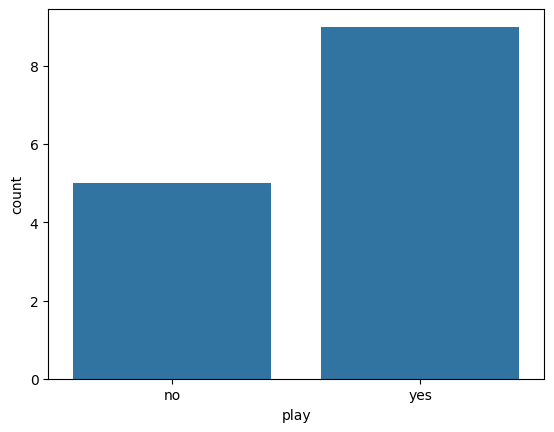

In [12]:
sns.countplot(x = base[Classificação]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
# colunas_selecionadas = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']



# base = base[colunas_selecionadas].copy()


# mediana_idade = base['Age'].median()
# moda_embarked = base['Embarked'].mode()[0]
# base['Embarked'].fillna(moda_embarked, inplace=True)
# base['Age'].fillna(mediana_idade, inplace=True)


# cols_label_encode = ['Sex']
# base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

data_mapped = base.copy()

temp_map = {'cool': 0, 'mild': 1, 'hot': 2}
humidity_map = {'normal': 0, 'high': 1}
windy_map = {'Weak': 0, 'Strong': 1}

data_mapped['temperature'] = data_mapped['temperature'].map(temp_map)
data_mapped['humidity'] = data_mapped['humidity'].map(humidity_map)
data_mapped['windy'] = data_mapped['windy'].map(windy_map)

le = LabelEncoder()
data_mapped['play'] = le.fit_transform(data_mapped['play'])

base = data_mapped.copy()

In [15]:
base

,outlook,temperature,humidity,windy,play
0,sunny,2,1,0,0
1,sunny,2,1,1,0
2,overcast,2,1,0,1
3,rainy,1,1,0,1
4,rainy,0,0,0,1
5,rainy,0,0,1,0
6,overcast,0,0,1,1
7,sunny,1,1,0,0
8,sunny,0,0,0,1
9,rainy,1,0,0,1




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [106]:
len(np.unique(base['Pclass'], return_counts=True)[0])

3

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:

# cols_onehot_encode = ['Embarked'
cols_onehot_encode = ['outlook']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [19]:
base_encoded

,outlook_overcast,outlook_rainy,outlook_sunny,temperature,humidity,windy,play
0,0.0,0.0,1.0,2,1,0,0
1,0.0,0.0,1.0,2,1,1,0
2,1.0,0.0,0.0,2,1,0,1
3,0.0,1.0,0.0,1,1,0,1
4,0.0,1.0,0.0,0,0,0,1
5,0.0,1.0,0.0,0,0,1,0
6,1.0,0.0,0.0,0,0,1,1
7,0.0,0.0,1.0,1,1,0,0
8,0.0,0.0,1.0,0,0,0,1
9,0.0,1.0,0.0,1,0,0,1


In [20]:
base_encoded.shape

(14, 7)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [21]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_prev

,outlook_overcast,outlook_rainy,outlook_sunny,temperature,humidity,windy
0,0.0,0.0,1.0,2,1,0
1,0.0,0.0,1.0,2,1,1
2,1.0,0.0,0.0,2,1,0
3,0.0,1.0,0.0,1,1,0
4,0.0,1.0,0.0,0,0,0
5,0.0,1.0,0.0,0,0,1
6,1.0,0.0,0.0,0,0,1
7,0.0,0.0,1.0,1,1,0
8,0.0,0.0,1.0,0,0,0
9,0.0,1.0,0.0,1,0,0


In [24]:
y_classe

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [25]:
y_classe.shape

(14,)

In [26]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [27]:
X_treino.shape

(11, 6)

In [28]:
X_teste.shape

(3, 6)

In [29]:
X_teste

,outlook_overcast,outlook_rainy,outlook_sunny,temperature,humidity,windy
9,0.0,1.0,0.0,1,0,0
11,1.0,0.0,0.0,1,1,1
0,0.0,0.0,1.0,2,1,0


In [30]:
y_treino

12    1
5     0
8     1
2     1
1     0
13    0
4     1
7     0
10    1
3     1
6     1
Name: play, dtype: int64

In [31]:
y_teste

9     1
11    1
0     0
Name: play, dtype: int64

In [32]:
import pickle

In [123]:
# with open('Titanic/Titanic.pkl', mode = 'wb') as f:
#   pickle.dump([X_treino, X_teste, y_treino, y_teste], f)

with open('../lista04/Play.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)